In [1]:
from torchvision import transforms, models
from torch import nn
import torch
import numpy as np
import cv2   # pip install opencv-python==3.3.0.9
from PIL import Image

In [2]:
model = models.densenet121(pretrained=True)
# model

In [3]:
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

In [4]:
model.load_state_dict(torch.load('transferlearning_model_equal.pt'))

<All keys matched successfully>

In [5]:
class_names = ['good', 'thirsty']
def predict_plant_situation(img):
    if isinstance(img, str):        
        # load the image from path
        img = Image.open(img, mode='r')
    else:
        # convert image array in to PIL image
        img = Image.fromarray(img)
    img_transform = transforms.Compose([transforms.Resize(255),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor()])
    img = img_transform(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    output = model(img)
#     _, pred = torch.max(output, 1)  # if you want to use index of pred 
    pred = class_names[np.squeeze(output.data.max(1, keepdim=True)[1])]      # if you want to use name of pred
    return pred

In [10]:
img_path = r"C:\Users\Sahin\Documents\GitHub\equal_project\flowers\test\good\3963330924_6c6a3fa7be_n.jpg"
output = predict_plant_situation(img_path)
output

'thirsty'

In [14]:
cap = cv2.VideoCapture(0)
cap.set(3,640) # adjust width
cap.set(4,480) # adjust height

while True:
    success, img = cap.read()
    cv2.imshow("Webcam", img) # This will open an independent window
#     if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
#         cap.release()
#         break
    cap.release()
    break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close

-1

In [15]:
output = predict_plant_situation(img)
output

'thirsty'

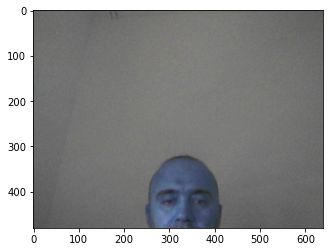

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img)